In [1]:
# Import libraries
import numpy as np
import pandas as pd
import time
import os.path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
os.chdir('C:\\Users\\anear\\OneDrive - National University of Ireland, Galway\\PhD\\Research Projects\\Ventilation Project')

In [2]:
# Load the patient data
_data = np.load('data/patients.npy', allow_pickle=True).tolist()
patients = _data['patients']
print("Loaded the patient data...")

# Load the static features
_data = np.load('data/static_features.npy', allow_pickle=True).tolist()
admission_type = _data['admission_type']
aids_haem_mets = _data['aids_haem_mets']
age = _data['age']
gender = _data['gender']
extubation_failure = _data['extubation_failure']
print("... and the static features... ")

# Load the dynamic features
_data = np.load('data/processed_features.npy', allow_pickle=True).tolist()
bicarb = _data['bicarb']
bilirubin = _data['bilirubin']
bp = _data['bp']
fio2 = _data['fio2']
gcs_eyes = _data['gcs_eyes']
gcs_motor = _data['gcs_motor']
gcs_verbal = _data['gcs_verbal']
hr = _data['hr']
pao2 = _data['pao2']
potassium = _data['potassium']
sodium = _data['sodium']
spo2 = _data['spo2']
temp = _data['temp']
urea = _data['urea']
urine = _data['urine']
wbc = _data['wbc']
fentanyl_cv = _data['fentanyl_cv']
fentanyl_mv = _data['fentanyl_mv']
ie_ratio = _data['ie_ratio']
insp_flow = _data['insp_flow']
insp_press = _data['insp_press']
peep = _data['peep']
propofol_cv = _data['propofol_cv']
propofol_mv = _data['propofol_mv']
psv = _data['psv']
resp = _data['resp']
tidvol_obs = _data['tidvol_obs']
tidvol_set = _data['tidvol_set']
tidvol_spon = _data['tidvol_spon']
print("... and the dynamic features!")

Loaded the patient data...
... and the static features... 
... and the dynamic features!


In [3]:
# Print shapes of the static features
print('admission_type - {}'.format(np.shape(admission_type)))
print('aids_haem_mets - {}'.format(np.shape(aids_haem_mets)))
print('age - {}'.format(np.shape(age)))
print('gender - {}'.format(np.shape(gender)))

# Combine static features
static = np.hstack((admission_type, aids_haem_mets, age.reshape(-1,1), gender.reshape(-1,1)))

# Check shape of combined static features
print('')
print('After combination - {}'.format(np.shape(static)))

# Broadcast features to have 24 time steps
hrs = 24
full_static = static
for i in range(hrs-1):
    full_static = np.dstack((full_static, static))
full_static = np.transpose(full_static, (0,2,1)) # transporse to shape (m,T,n)

# Check shape of combined static features
print('')
print('Final array for static features - {}'.format(np.shape(full_static)))

admission_type - (9065, 3)
aids_haem_mets - (9065, 3)
age - (9065,)
gender - (9065,)

After combination - (9065, 8)

Final array for static features - (9065, 24, 8)


In [4]:
dynamic = [bicarb, bilirubin, bp, fio2, gcs_eyes, gcs_verbal, gcs_motor, hr, pao2, potassium, sodium, spo2, temp, urea, urine, wbc, \
          fentanyl_cv, fentanyl_mv, ie_ratio, insp_flow, insp_press, peep, propofol_cv, propofol_mv, psv, resp, tidvol_obs, tidvol_set, tidvol_spon]

# Print shapes of the dynamic features
print('bicarb - {}'.format(np.shape(bicarb)))
print('bilirubin - {}'.format(np.shape(bilirubin)))
print('bp - {}'.format(np.shape(bp)))
print('fio2 - {}'.format(np.shape(fio2)))
print('gcs_eyes - {}'.format(np.shape(gcs_eyes)))
print('gcs_verbal - {}'.format(np.shape(gcs_verbal)))
print('gcs_motor - {}'.format(np.shape(gcs_motor)))
print('hr - {}'.format(np.shape(hr)))
print('pao2 - {}'.format(np.shape(pao2)))
print('potassium - {}'.format(np.shape(potassium)))
print('sodium - {}'.format(np.shape(sodium)))
print('spo2 - {}'.format(np.shape(spo2)))
print('temp - {}'.format(np.shape(temp)))
print('urea - {}'.format(np.shape(urea)))
print('urine - {}'.format(np.shape(urine)))
print('wbc - {}'.format(np.shape(wbc)))
print('fentanyl_cv - {}'.format(np.shape(fentanyl_cv)))
print('fentanyl_mv - {}'.format(np.shape(fentanyl_mv)))
print('ie_ratio - {}'.format(np.shape(ie_ratio)))
print('insp_flow - {}'.format(np.shape(insp_flow)))
print('insp_press - {}'.format(np.shape(insp_press)))
print('peep - {}'.format(np.shape(peep)))
print('propofol_cv - {}'.format(np.shape(propofol_cv)))
print('propofol_mv - {}'.format(np.shape(propofol_mv)))
print('psv - {}'.format(np.shape(psv)))
print('resp - {}'.format(np.shape(resp)))
print('tidvol_obs - {}'.format(np.shape(tidvol_obs)))
print('tidvol_set - {}'.format(np.shape(tidvol_set)))
print('tidvol_spon - {}'.format(np.shape(tidvol_spon)))

# Combine dynamic features
full_dynamic = bicarb
for i in range(len(dynamic)-1):
    full_dynamic = np.dstack((full_dynamic, dynamic[i+1]))
    
# Check shape of combined dynamic features
print('')
print('Final array for dynamic features - {}'.format(np.shape(full_dynamic)))

bicarb - (9065, 24)
bilirubin - (9065, 24)
bp - (9065, 24)
fio2 - (9065, 24)
gcs_eyes - (9065, 24)
gcs_verbal - (9065, 24)
gcs_motor - (9065, 24)
hr - (9065, 24)
pao2 - (9065, 24)
potassium - (9065, 24)
sodium - (9065, 24)
spo2 - (9065, 24)
temp - (9065, 24)
urea - (9065, 24)
urine - (9065, 24)
wbc - (9065, 24)
fentanyl_cv - (9065, 24)
fentanyl_mv - (9065, 24)
ie_ratio - (9065, 24)
insp_flow - (9065, 24)
insp_press - (9065, 24)
peep - (9065, 24)
propofol_cv - (9065, 24)
propofol_mv - (9065, 24)
psv - (9065, 24)
resp - (9065, 24)
tidvol_obs - (9065, 24)
tidvol_set - (9065, 24)
tidvol_spon - (9065, 24)

Final array for dynamic features - (9065, 24, 29)


In [5]:
# Create final arrays of all data
X = np.transpose(np.dstack((full_dynamic, full_static)), (0,2,1))
y = extubation_failure
print('X - {}'.format(np.shape(X)))
print('y - {}'.format(np.shape(y)))

X - (9065, 37, 24)
y - (9065,)


In [6]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Split the test data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=0.5, random_state=42)

# Check the shapes of the outputs
print("X_train: {}".format(np.shape(X_train)))
print("y_train: {}".format(np.shape(y_train)))
print("X_val: {}".format(np.shape(X_val)))
print("y_val: {}".format(np.shape(y_val)))
print("X_test: {}".format(np.shape(X_test)))
print("y_test: {}".format(np.shape(y_test)))

X_train: (7252, 37, 24)
y_train: (7252,)
X_val: (906, 37, 24)
y_val: (906,)
X_test: (907, 37, 24)
y_test: (907,)


In [7]:
# Print information about the created arrays
print("No. of patients: {}".format(len(y)))
print("No. of patients in train, val, test sets: {}, {}, {}".format(len(X_train), len(X_val), len(X_test)))
print("No. of extubation failures in train, val, test sets: {}, {}, {}".format(str(sum(y_train)), str(sum(y_val)), str(sum(y_test))))
print("Proportion of extubation failures in train, val, test sets: {}%, {}%, {}%".format(round(sum(y_train)/len(y_train)*100,3), round(sum(y_val)/len(y_val)*100,3), round(sum(y_test)/len(y_test)*100,3)))

No. of patients: 9065
No. of patients in train, val, test sets: 7252, 906, 907
No. of extubation failures in train, val, test sets: 2987, 383, 390
Proportion of extubation failures in train, val, test sets: 41.189%, 42.274%, 42.999%


In [8]:
# Write a function to normalises the data using the z-score, treating each feature separately
def ZScoreScaler_3D(array, mean=None, std=None):
    
    '''
    INPUTS:
    array - a 3D array of shape (m, n, T), where m = number of examples, n = number of features, and T = number of time steps.
    mean (optional) - the mean you want to apply for the scaling. If not specified, the mean will be calculated from the array.
    std (optional) - the standard deviation you want to apply for the scaling. If not specified, the standard deviation will be calculated from the array.
    -> note that minimum and maximum, if specified, need to be n-length vectors, where each entry represents the min/max for each feature in the array.
    
    OUTPUTS:
    scaled_array - a 3D array where each entry in array has been scaled using the equation y = (x - mean) / std, and the mean/standard deviation has been calculated individually for each feature.
    mean_vector (optional) - an n-length vector where each entry is the mean for each feature. Only returned if mean is not specified.
    std_vector (optional) - an n-length vector where each entry is the standard deviation for each feature. Only returned if std is not specified.
    '''
    
    # First, get the dimensions of the input array
    m, n, T = np.shape(array)
    
    # Calculate the mean of each feature
    if mean == None:
        mean_vector = []
        for i in range(n):
            mean_vector.append(np.mean(array[:,i,:]))
        no_mean_std = True # used for deciding whether to output the min_vector at the end
    else:
        mean_vector = mean
        no_mean_std = False
    
    # Calculate the standard deviation of each feature
    if std == None:
        std_vector = []
        for i in range(n):
            std_vector.append(np.std(array[:,i,:]))
    else:
        std_vector = std
        
    # Scale each feature using the formula: y = (x - mean) / std
    scaled_array = np.zeros((m,n,T))
    for i in range(n):
        scaled_array[:,i,:] = (array[:,i,:] - mean_vector[i]) / std_vector[i]
    
    # Return the outputs
    if no_mean_std == True:
        return scaled_array, mean_vector, std_vector
    else:
        return scaled_array

In [9]:
# Scale the training data, and save the scaler
X_train_norm, mean_vector, std_vector = ZScoreScaler_3D(X_train)

# Use the same scaler to scale the validation and test data
X_val_norm = ZScoreScaler_3D(X_val, mean_vector, std_vector)
X_test_norm = ZScoreScaler_3D(X_test, mean_vector, std_vector)

# Check the shapes of the outputs
print("X_train_norm: {}".format(np.shape(X_train_norm)))
print("X_val_norm: {}".format(np.shape(X_val_norm)))
print("X_test_norm: {}".format(np.shape(X_test_norm)))

X_train_norm: (7252, 37, 24)
X_val_norm: (906, 37, 24)
X_test_norm: (907, 37, 24)


In [12]:
# Save to ML_data.npy
if not os.path.exists('./res'):
    os.makedirs('./res')

tosave = {'X_train': X_train, 'X_val': X_val, 'X_test': X_test, \
          'X_train_norm': X_train_norm, 'X_val_norm': X_val_norm, 'X_test_norm': X_test_norm, \
          'y_train': y_train, 'y_val': y_val, 'y_test': y_test}
np.save('data/ML_data.npy',tosave)
print("Saved!")

Saved!


In [13]:
# Load the patient data
_data = np.load('data/ML_data.npy', allow_pickle=True).tolist()
X_train = _data['X_train']
print("Loaded the patient data...")

Loaded the patient data...


In [14]:
# Extract data for some individual
id = 2
time = np.arange(24)
patient_data = X_train[id,:,:]
hr = patient_data[7,:]
bp = patient_data[2,:]
rr = patient_data[25,:]

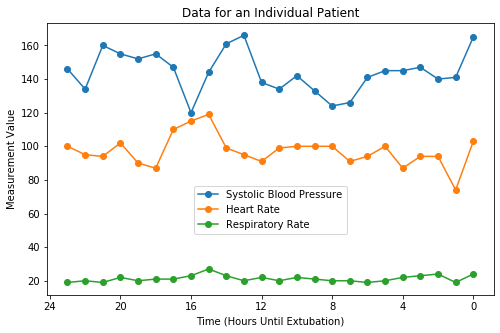

In [15]:
# Plot the processed HR data for hospital admission ID 145834
plt.figure(figsize=(8,5))
plt.plot((time+1)-24, bp, marker="o", label = 'Systolic Blood Pressure')
plt.plot((time+1)-24, hr, marker="o", label = 'Heart Rate')
plt.plot((time+1)-24, rr, marker="o", label = 'Respiratory Rate')
plt.xlabel('Time (Hours Until Extubation)')
plt.xticks(ticks=np.arange(-24, 0.1, step=4), labels=np.arange(0, 25, step=4)[::-1])
plt.ylabel('Measurement Value')
plt.title('Data for an Individual Patient')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.42))
plt.savefig('plots/patient.png', bbox_inches='tight')
plt.show()